Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Read the Excel file 'googleplaystore.csv.xlsx'
df = pd.read_excel('googleplaystore.csv.xlsx')

# Display a random sample of 5 rows
print(df.sample(5))

                                  App            Category  Rating  Reviews  \
1049                      ING Banking             FINANCE     4.4    39041   
1803   Harry Potter: Hogwarts Mystery                GAME     4.4  1107310   
10614           Ocala Star Banner, FL  NEWS_AND_MAGAZINES     4.5       75   
7856             Radiology CT Anatomy             MEDICAL     4.2      345   
7701    Evolve CP Calc. for PokemonGo               TOOLS     3.9      116   

                     Size     Installs  Type Price Content Rating  \
1049   Varies with device   1,000,000+  Free     0       Everyone   
1803   Varies with device  10,000,000+  Free     0           Teen   
10614                8.1M       5,000+  Free     0       Everyone   
7856                  14M      50,000+  Free     0       Everyone   
7701                 3.3M      10,000+  Free     0       Everyone   

                 Genres       Last Updated         Current Ver  \
1049            Finance     August 3, 2018  Varies

### Data Cleaning

##### 1. Which of the following column(s) has/have null values?

In [3]:
df.columns[df.isnull().any()].tolist()

['App', 'Rating', 'Type', 'Content Rating', 'Current Ver', 'Android Ver']

In [4]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

##### 2. Clean the `Rating` column and the other columns containing null values

 Cleaning a DataFrame: Handling Missing Values

This guide walks you through a 3-step process to clean a DataFrame's "Rating" column and any other columns containing missing values.

1. **Remove the invalid values from "Rating" (if any). Just set them as NaN**

2. **Fill the null values in the "Rating" column using the mean()**

3. **Clean any other non-numerical columns by just dropping the values**

<Axes: >

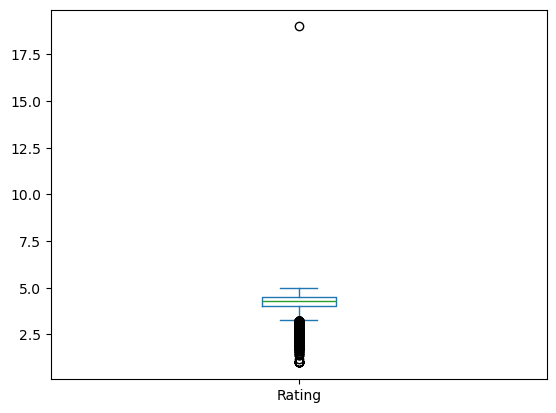

In [5]:
df['Rating'].plot(kind='box')

In [6]:
df['Rating'].loc[df['Rating'] > 5] = np.nan

C:\Users\OUALID\AppData\Local\Temp\ipykernel_6568\164221896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rating'].loc[df['Rating'] > 5] = np.nan


In [7]:
df['Rating'].fillna(df['Rating'].mean(), inplace = True)

In [8]:
df.dropna(inplace = True)

In [9]:
df.columns[df.isnull().any()].tolist()

[]

In [10]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

##### 3. Clean the column `Reviews` and make it numeric

**We will clean the Reviews column by transforming the values to the correct numeric representation. For example, 5M should be 5000000.**

In [11]:
df['Reviews'] = df['Reviews'].astype(str)
df.loc[df['Reviews'].str.contains('M'), 'Reviews'] = (pd.to_numeric(
    df.loc[df['Reviews'].str.contains('M'), 'Reviews'].str.replace('M', '')) * 1_000_000).astype('str')
df.loc[df['Reviews'].str.contains('k'), 'Reviews'] = (pd.to_numeric(
    df.loc[df['Reviews'].str.contains('k'), 'Reviews'].str.replace('k', '')) * 1_000).astype('str')
df['Reviews'] = pd.to_numeric(df['Reviews'])

##### 4. How many duplicated apps are there?

In [12]:
df['App'].duplicated(keep=False).sum()

1979

Drop duplicated apps keeping the ones with the greatest number of reviews

In [13]:
df = df.sort_values(by=['App','Reviews'], ascending=False).drop_duplicates(subset='App', keep='first')

##### 6. Format the `Category` column

Categories are all uppercase and words are separated using underscores. Instead, we want them with capitalized in the first character and the underscores transformed as whitespaces.

Example, the category AUTO_AND_VEHICLES should be transformed to: Auto and vehicles. Also, if you find any other wrong value transform it into an Unknown category.

In [14]:
df['Category'].unique()

array(['ENTERTAINMENT', 'TOOLS', 'SOCIAL', 'LIFESTYLE', 'VIDEO_PLAYERS',
       'COMICS', 'FAMILY', 'BOOKS_AND_REFERENCE', 'COMMUNICATION',
       'MAPS_AND_NAVIGATION', 'HOUSE_AND_HOME', 'SHOPPING', 'GAME',
       'ART_AND_DESIGN', 'NEWS_AND_MAGAZINES', 'AUTO_AND_VEHICLES',
       'FINANCE', 'FOOD_AND_DRINK', 'WEATHER', 'PERSONALIZATION',
       'EVENTS', 'MEDICAL', 'TRAVEL_AND_LOCAL', 'SPORTS', 'DATING',
       'BUSINESS', 'EDUCATION', 'PRODUCTIVITY', 'PHOTOGRAPHY', 'BEAUTY',
       'HEALTH_AND_FITNESS', 'LIBRARIES_AND_DEMO', 'PARENTING'],
      dtype=object)

In [15]:
df['Category'] = df['Category'].replace('_', ' ', regex=True)
df['Category'] = df['Category'].str.capitalize()
df['Category'].unique()

array(['Entertainment', 'Tools', 'Social', 'Lifestyle', 'Video players',
       'Comics', 'Family', 'Books and reference', 'Communication',
       'Maps and navigation', 'House and home', 'Shopping', 'Game',
       'Art and design', 'News and magazines', 'Auto and vehicles',
       'Finance', 'Food and drink', 'Weather', 'Personalization',
       'Events', 'Medical', 'Travel and local', 'Sports', 'Dating',
       'Business', 'Education', 'Productivity', 'Photography', 'Beauty',
       'Health and fitness', 'Libraries and demo', 'Parenting'],
      dtype=object)

##### 7. Clean and convert the `Installs` column to numeric type

Clean and transform Installs as a numeric type. Some values in Installs will have a + modifier. Just remove the string and honor the original number (for example +2,500 or 2,500+ should be transformed to the number 2500).

In [16]:
df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '').astype(float)
df['Installs'].dtype

C:\Users\OUALID\AppData\Local\Temp\ipykernel_6568\169443242.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '').astype(float)


dtype('float64')

##### 8. Clean and convert the `Size` column to numeric (representing bytes)

The Size column is of type object. Some values contain either a M or a k that indicate Kilobytes (1024 bytes) or Megabytes (1024 kb). These values should be transformed to their corresponding value in bytes. For example, 898k will become 919552 (898 * 1024).

Some other values are completely invalid (there's no way to infer the numeric type from them). For these, just replace the value for 0.

In [17]:
df['Size'].unique()

array(['4.0M', '3.2M', '18M', '26M', '59M', '34M', 'Varies with device',
       '30M', '21M', '15M', '17M', '22M', '41M', '9.3M', '8.5M', '7.3M',
       '14M', '6.8M', '4.5M', '40M', '16M', '8.0M', '2.7M', '12M', '9.8M',
       '32M', '3.8M', '24M', '1.7M', '36M', '549k', '3.0M', '38M', '1.8M',
       '9.7M', '2.5M', '10.0M', '64M', '13M', '3.5M', '19M', '7.0M',
       '3.4M', '4.2M', '6.9M', '39M', '28M', '9.6M', '11M', '9.5M',
       '6.1M', '881k', '2.1M', '2.2M', '1.5M', '27M', '5.4M', '6.7M',
       '6.2M', '118k', '20M', '4.4M', '8.1M', '2.6M', '4.1M', '3.7M',
       '8.8M', '8.4M', '898k', '29M', '57M', '5.3M', '23M', '8.7M', '25M',
       '99M', '43M', '655k', '6.0M', '2.8M', '3.1M', '49M', '1.0M',
       '1.9M', '9.2M', '8.6M', '31M', '35M', '6.3M', '73M', '7.8M', '77M',
       '63M', '55M', '45M', '10M', '2.4M', '9.4M', '704k', '53M', '5.0M',
       '2.9M', '78M', '4.6M', '3.3M', '1.4M', '5.6M', '5.8M', '4.8M',
       '47M', '50M', '266k', '7.5M', '2.3M', '74M', '1.3M', '7.6M

In [18]:
df['Size'] = df['Size'].astype(str)
df.loc[df['Size']=='Varies with device' ,'Size'] = "0"
df.loc[df['Size'].str.contains('M'), 'Size'] = (pd.to_numeric(df.loc[df['Size'].str.contains('M'), 'Size'].str.replace('M', '')) * 1_024 * 1_024).astype('str')
df.loc[df['Size'].str.contains('k'), 'Size'] = (pd.to_numeric(df.loc[df['Size'].str.contains('k'), 'Size'].str.replace('k', '')) * 1_024).astype('str')
df['Size'] = pd.to_numeric(df['Size'])
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4894,Chatime AB Rewards,Family,4.191757,9,23068672.0,1000.0,Free,0,Everyone,Entertainment,"June 22, 2018",2.7.0621,4.2 and up
3077,NCAA Sports,Sports,3.900000,4272,16777216.0,500000.0,Free,0,Everyone,Sports,"April 23, 2018",3.0.13,4.1 and up
3998,C Programs and Reference,Books and reference,4.200000,873,2621440.0,50000.0,Free,0,Everyone,Books & Reference,"July 31, 2014",2.2,2.1 and up
10694,FO SODEXO,Communication,4.191757,0,16777216.0,100.0,Free,0,Everyone,Communication,"March 13, 2018",1,4.1 and up
2863,Photo Mixer,Photography,3.900000,55427,6920601.6,10000000.0,Free,0,Everyone,Photography,"March 25, 2016",5.1,2.3.3 and up


##### 9. Clean and convert the `Price` column to numeric

Values of the Price column are strings representing price with special symbol '$'.

In [19]:
df['Price'].unique()

array([0, '$399.99', '$1.49', '$2.99', '$1.99', '$1.20', '$0.99', '$4.29',
       '$4.99', '$4.49', '$3.99', '$10.00', '$154.99', '$1.96', '$5.49',
       '$19.40', '$5.99', '$12.99', '$2.50', '$19.99', '$2.56', '$9.99',
       '$1.04', '$2.90', '$1.00', '$2.49', '$79.99', '$8.99', '$16.99',
       '$1.97', '$3.49', '$17.99', '$6.99', '$6.49', '$2.95', '$4.59',
       '$4.85', '$7.49', '$10.99', '$4.84', '$1.76', '$7.99', '$29.99',
       '$4.60', '$3.02', '$14.99', '$39.99', '$1.70', '$15.99', '$24.99',
       '$9.00', '$1.59', '$8.49', '$1.61', '$89.99', '$74.99', '$15.46',
       '$1.26', '$400.00', '$299.99', '$379.99', '$18.99', '$37.99',
       '$389.99', '$25.99', '$3.88', '$13.99', '$2.00', '$30.99',
       '$394.99', '$11.99', '$4.77', '$3.61', '$200.00', '$28.99',
       '$46.99', '$3.28', '$3.95', '$14.00', '$2.59', '$4.80', '$109.99',
       '$1.75', '$3.90', '$1.50', '$1.29', '$2.60', '$19.90', '$5.00',
       '$3.04', '$33.99', '$3.08'], dtype=object)

In [20]:
df['Price'] = df['Price'].astype(str)
df.loc[df['Price']=='Free', 'Price'] = "0"
df['Price'] = df['Price'].str.replace('$', '').astype(float)
df['Price'].dtype
df.sample(5)

C:\Users\OUALID\AppData\Local\Temp\ipykernel_6568\3388138261.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '').astype(float)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5934,Ba Zi Fortune,Lifestyle,3.900000,592,2621440.0,100000.0,Free,0.00,Everyone,Lifestyle,"January 2, 2018",1.0.23,2.3 and up
5373,I AM RICH PRO PLUS,Finance,4.000000,36,42991616.0,1000.0,Paid,399.99,Everyone,Finance,"June 25, 2018",1.0.2,4.1 and up
6857,Hilverda De Boer B.V. App,Shopping,4.191757,5,19922944.0,500.0,Free,0.00,Everyone,Shopping,"February 2, 2018",2.5.0,4.0.3 and up
4308,K-App Mitarbeiter Galeria Kaufhof,Productivity,4.191757,0,19922944.0,100.0,Free,0.00,Everyone,Productivity,"July 10, 2018",3.27.1,4.4 and up
4025,C Prowess,Family,4.800000,306,3460300.8,5000.0,Free,0.00,Everyone,Education,"June 3, 2017",1.2,4.1 and up


##### 10. Paid or free?

Now that we have cleaned the Price column, let's create another auxiliary Distribution column.

This column should contain Free/Paid values depending on the app's price.

In [24]:
df.loc[df['Price'] == 0, 'Distribution'] = 'Free'
df.loc[df['Price'] > 0, 'Distribution'] = 'Paid'
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
882,ðŸ”¥ Football Wallpapers 4K | Full HD Backgrou...,Entertainment,4.700000,11661,4194304.0,1000000.0,Free,0.00,Everyone,Entertainment,"July 14, 2018",1.1.3.2,4.0.3 and up,Free
7559,ðŸ“ Smart Ruler â†”ï¸ cm/inch measuring for ...,Tools,4.000000,19,3355443.2,10000.0,Free,0.00,Everyone,Tools,"October 21, 2017",1,4.2 and up,Free
2575,"ðŸ’˜ WhatsLov: Smileys of love, stickers and GIF",Social,4.600000,22098,18874368.0,1000000.0,Free,0.00,Everyone,Social,"July 24, 2018",4.2.4,4.0.3 and up,Free
4362,ðŸ’Ž I'm rich,Lifestyle,3.800000,718,27262976.0,10000.0,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up,Paid
6334,"ë½•í‹°ë¹„ - ê°œì¸ë°©ì†¡, ì¸í„°ë„·ë°©ì†¡, BJë...",Video players,4.191757,414,61865984.0,100000.0,Free,0.00,Mature 17+,Video Players & Editors,"July 18, 2018",4.0.7,4.0.3 and up,Free


### Analysis

##### 11. Which app has the most reviews?

In [29]:
df[['App','Reviews']].sort_values(by=['Reviews'], ascending=False).iloc[0]

App        Facebook
Reviews    78158306
Name: 2544, dtype: object

##### 12. What category has the highest number of apps uploaded to the store?

In [34]:
df['Category'].value_counts().head(1)

Family    1870
Name: Category, dtype: int64

<Axes: >

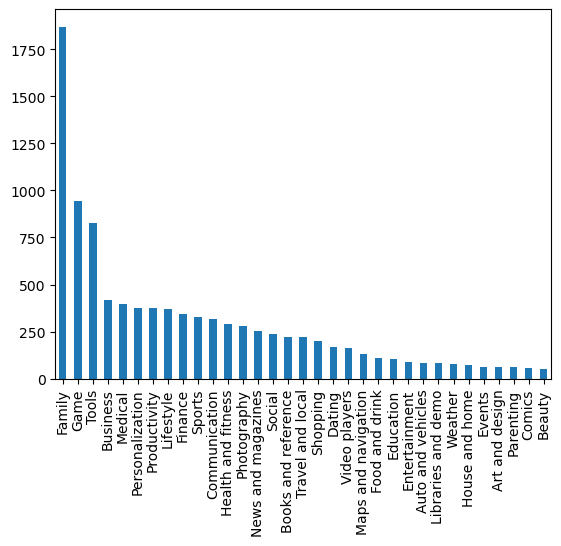

In [30]:
df['Category'].value_counts().plot(kind='bar')

##### 13. To which category belongs the most expensive app?

In [36]:
df[['App','Category','Price']].sort_values(by=['Price'], ascending=False).iloc[0]

App         I'm Rich - Trump Edition
Category                   Lifestyle
Price                          400.0
Name: 4367, dtype: object

##### 14. What's the name of the most expensive game?

In [40]:
df[['App','Category','Price']].query("Category == 'Game'").sort_values(by=['Price'], ascending=False).iloc[0]

App         The World Ends With You
Category                       Game
Price                         17.99
Name: 4203, dtype: object

##### 15. Which is the most popular Finance App?

In [42]:
df[['App','Category','Installs']].query("Category == 'Finance'").sort_values(by=['Installs'], ascending=False).iloc[0]

App          Google Pay
Category        Finance
Installs    100000000.0
Name: 5601, dtype: object

##### 16. What *Teen* Game has the most reviews?

What app from the Game category and catalogued as Teen in Content Rating has the greatest number of reviews?

In [47]:
df[['App','Category', 'Content Rating' ,'Reviews']].query("Category == 'Game'and `Content Rating` == 'Teen'").sort_values(by=['Reviews'], ascending=False).iloc[0]

App               Asphalt 8: Airborne
Category                         Game
Content Rating                   Teen
Reviews                       8389714
Name: 3912, dtype: object

##### 17. Which is the free game with the most reviews?

In [48]:
df[['App','Category', 'Distribution' ,'Reviews']].query("Category == 'Game'and Distribution == 'Free'").sort_values(by=['Reviews'], ascending=False).iloc[0]

App             Clash of Clans
Category                  Game
Distribution              Free
Reviews               44893888
Name: 1879, dtype: object

##### 18. How many Tb (tebibytes) were transferred (overall) for the most popular Lifestyle app?

Find the most popular app from the Lifestyle category (by Installs). Then calculate the total transfer multiplying Size by Installs and perform the transformation from bytes to Tb.

In [53]:
df_Tb =df[['App','Installs', 'Size','Category']].query("Category == 'Lifestyle'").sort_values(by=['Installs'], ascending=False).iloc[0]
df_Tb

App              Tinder
Installs    100000000.0
Size         71303168.0
Category      Lifestyle
Name: 4587, dtype: object

In [56]:
(df_Tb['Installs'] * df_Tb['Size']) / ( 1_024 * 1_024 * 1_024 * 1_024 )

6484.9853515625

## Authors

- [@Oualid El-Ouardi](https://github.com/OUALi0)